<a href="https://colab.research.google.com/github/ShifatSarwar/N-QueensFun/blob/main/Genetic_Algorithm_16301084_Shifat_Sarwar_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

How many Queens have problems with each other? 8
The Queens has been successfully placed to avoid conficts
This map of rows and column is shown below: 


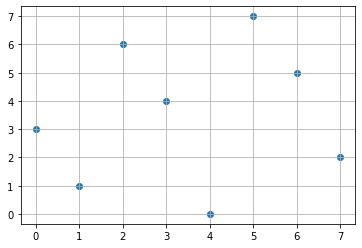

In [1]:
import numpy as np
import random as r
import matplotlib.pyplot as plt

board_size=int(input("How many Queens have problems with each other? "))
population=[]
fitnesslist=[]
totalbest=(board_size*(board_size-1))/2

def generate_population_state(b_size):
  popcolumn=[]
  for index in range(b_size):
    popcolumn.append(r.randint(0,b_size-1))
  return popcolumn

def calculate_fitness(col_array):
  horizontal_collisions=abs(len(col_array) - len(np.unique(col_array)))
  diagonal_collisions = 0
  for i in range(len(col_array)):
    for j in range(len(col_array)):
      if i != j: 
        mod=abs(i-j)
        mod2=abs(col_array[i]-col_array[j])
        if mod==mod2:
          diagonal_collisions+=1
  fitness = ((len(col_array)*(len(col_array)-1))/2) -(horizontal_collisions+diagonal_collisions)
  return fitness

def mutate(c):
  change_index=-1
  value=0
  for v in range(len(c)):
    if v not in c:
      value=v
  
  for item in c:
    if c.count(item)>1:
      change_index=c.index(item)

  if(change_index>=0):
    c[change_index]=value
  return c


for psize in range(100):
  population.append(generate_population_state(board_size))

for col in population:
  fitnesslist.append(calculate_fitness(col))

def updatepopulation(npop):
  for val in fitnesslist:
    if val<totalbest-(0.5*totalbest):
      population.pop(fitnesslist.index(val))
      fitnesslist.pop(fitnesslist.index(val))
      
  for val in npop:
    population.append(val)
    fitnesslist.append(calculate_fitness(val))

iteration=0
 
while(max(fitnesslist)<=totalbest-1):

  father_index=r.randint(0,len(population)-1)
  father=population[father_index]
  mother_index=r.randint(0,len(population)-1)
  mother=population[mother_index]
  crosspoint=r.randint(1,board_size-2)
  child_one=[]
  child_two=[]
  newpopulation=[]

  for val in range(len(father)):
    if(val<crosspoint):
      child_one.append(father[val])
      child_two.append(mother[val])
    else:
      child_one.append(mother[val])
      child_two.append(father[val])
  
  temp=[]

  if(calculate_fitness(child_one)>totalbest-10):
    newpopulation.append(child_one)
    temp=mutate(child_one)
    if(temp!=child_one):
      newpopulation.append(temp)

  
  if(calculate_fitness(child_two)>totalbest-10):
    newpopulation.append(child_two)
    temp=mutate(child_two)
    if(temp!=child_two):
      newpopulation.append(temp)
  iteration+=1
  updatepopulation(newpopulation)
  
print("The Queens has been successfully placed to avoid conficts")
print("This map of rows and column is shown below: ")

y=population[fitnesslist.index(max(fitnesslist))]
x=[]
#print(iteration)
for num in range(board_size):
  x.append(num)

plt.scatter(x,y)
plt.grid()
plt.show()